<a href="https://colab.research.google.com/github/JManuelRG/simuladores/blob/main/Cobra_E_Coli_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Ejemplo:
# Optimización en CobraPy.
# The COnstraint-Based
# Reconstruction  and Analysis

Ejemplo de Optimización con el Modelo de E. coli en COBRApy

Objetivo:
Maximizar la tasa de crecimiento de E. coli bajo condiciones de limitación de glucosa y observar cómo varía la producción de acetato (un subproducto común del metabolismo).

Pasos:
Instalación y carga del modelo: El modelo básico de E. coli puede ser descargado en formato SBML desde bases de datos como BiGG Models o puede usarse el modelo incluido en COBRApy:

In [ ]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
import cobra
from cobra.io import load_model

model = load_model("textbook") #importar modelo de e coli

# Análisis del Modelo e importación

In [ ]:
model.summary() #resumen del modelo

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


# Verificar reacciones:

In [ ]:
model.reactions

[<Reaction ACALD at 0x7e1b1444dd20>,
 <Reaction ACALDt at 0x7e1b1444fdc0>,
 <Reaction ACKr at 0x7e1b1444c100>,
 <Reaction ACONTa at 0x7e1b1444ca30>,
 <Reaction ACONTb at 0x7e1b1444e8c0>,
 <Reaction ACt2r at 0x7e1b1444c5b0>,
 <Reaction ADK1 at 0x7e1b1444c7f0>,
 <Reaction AKGDH at 0x7e1b1444c9a0>,
 <Reaction AKGt2r at 0x7e1b143eb2b0>,
 <Reaction ALCD2x at 0x7e1b143eabc0>,
 <Reaction ATPM at 0x7e1b143eace0>,
 <Reaction ATPS4r at 0x7e1b1444da50>,
 <Reaction Biomass_Ecoli_core at 0x7e1b1444c0d0>,
 <Reaction CO2t at 0x7e1b143e9000>,
 <Reaction CS at 0x7e1b143ea3e0>,
 <Reaction CYTBD at 0x7e1b143e9630>,
 <Reaction D_LACt2 at 0x7e1b143ead40>,
 <Reaction ENO at 0x7e1b143cf820>,
 <Reaction ETOHt2r at 0x7e1b143cfa00>,
 <Reaction EX_ac_e at 0x7e1b143e9660>,
 <Reaction EX_acald_e at 0x7e1b143ea740>,
 <Reaction EX_akg_e at 0x7e1b143e98a0>,
 <Reaction EX_co2_e at 0x7e1b143e98d0>,
 <Reaction EX_etoh_e at 0x7e1b143ced10>,
 <Reaction EX_for_e at 0x7e1b143cebf0>,
 <Reaction EX_fru_e at 0x7e1b143cead0>,
 

In [ ]:
# Verificar el identificador correcto de la reacción de biomasa
for reaction in model.reactions:
    print(reaction.id)

ACALD
ACALDt
ACKr
ACONTa
ACONTb
ACt2r
ADK1
AKGDH
AKGt2r
ALCD2x
ATPM
ATPS4r
Biomass_Ecoli_core
CO2t
CS
CYTBD
D_LACt2
ENO
ETOHt2r
EX_ac_e
EX_acald_e
EX_akg_e
EX_co2_e
EX_etoh_e
EX_for_e
EX_fru_e
EX_fum_e
EX_glc__D_e
EX_gln__L_e
EX_glu__L_e
EX_h_e
EX_h2o_e
EX_lac__D_e
EX_mal__L_e
EX_nh4_e
EX_o2_e
EX_pi_e
EX_pyr_e
EX_succ_e
FBA
FBP
FORt2
FORti
FRD7
FRUpts2
FUM
FUMt2_2
G6PDH2r
GAPD
GLCpts
GLNS
GLNabc
GLUDy
GLUN
GLUSy
GLUt2r
GND
H2Ot
ICDHyr
ICL
LDH_D
MALS
MALt2_2
MDH
ME1
ME2
NADH16
NADTRHD
NH4t
O2t
PDH
PFK
PFL
PGI
PGK
PGL
PGM
PIt2r
PPC
PPCK
PPS
PTAr
PYK
PYRt2
RPE
RPI
SUCCt2_2
SUCCt3
SUCDi
SUCOAS
TALA
THD2
TKT1
TKT2
TPI


In [ ]:
# Asignar la función objetivo: biomasa
model.objective = 'Biomass_Ecoli_core'

Límite de glucosa: Establecemos un límite para el flujo de entrada de glucosa, que es una fuente importante de carbono en el metabolismo de E. coli.

In [ ]:
# Limitar la disponibilidad de glucosa (entrada a través de EX_glc__D_e)
model.reactions.get_by_id('EX_glc__D_e').lower_bound = -10.0  # mmol/gDW/h




El valor "10.0" en -10.0 mmol/gDW/h indica que la célula tiene permitido consumir hasta 10 mmol de glucosa por gramo de peso seco de célula (gDW) por hora.

Esta cantidad refleja la velocidad máxima de consumo de glucosa. En este caso, limitamos el flujo de entrada de glucosa a 10 mmol/gDW/h para simular una situación donde la disponibilidad de glucosa es limitada, algo que se puede observar en cultivos controlados o condiciones experimentales.


En FBA, los signos de los flujos tienen una interpretación importante:
Un flujo negativo en una reacción de intercambio (como 'EX_glc__D_e', que representa el intercambio de glucosa entre la célula y el entorno) significa que la célula consume glucosa desde el medio externo.
Un flujo positivo en una reacción de intercambio significaría que el compuesto se está produciendo o excretando por la célula al medio.
En el caso de la glucosa:

Un flujo negativo, como -10.0, significa que la célula está importando glucosa desde el medio externo hacia su interior a una tasa máxima de 10 mmol/gDW/h.

Optimización: Realizamos el análisis de balance de flujo (FBA) para maximizar el crecimiento celular.

In [ ]:
# Ejecutar la optimización del modelo
solution = model.optimize()

In [ ]:
# Mostrar el valor de la función objetivo (tasa de crecimiento)
print(f"Tasa de crecimiento: {solution.objective_value:.4f} h^-1")

Tasa de crecimiento: 0.8739 h^-1



La tasa de crecimiento que obtienes al optimizar el modelo metabólico en COBRApy, específicamente en análisis de balance de flujo (FBA), generalmente tiene unidades de h⁻¹ (inverso de horas). Esto indica la fracción del crecimiento celular por hora, conocida como tasa específica de crecimiento.

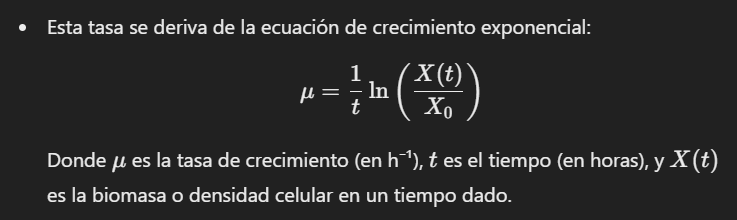

Producción de acetato: Al final, obtenemos el flujo de producción de acetato (reacción 'EX_ac_e'), que es un subproducto importante en muchas condiciones de cultivo de E. coli.

In [ ]:
# Obtener el flujo de la reacción de producción de acetato (EX_ac_e)
acetate_flux = model.reactions.get_by_id('EX_ac_e').flux
print(f"Producción de acetato: {acetate_flux:.4f} mmol/gDW/h")

Producción de acetato: 0.0000 mmol/gDW/h
